In [4]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Download latest version
path = kagglehub.dataset_download("CooperUnion/cardataset")

# Print path to verify dataset files location
print("Path to dataset files:", path)

# List all files in the dataset directory to find the CSV file
files_in_path = os.listdir(path)
print("Files in path:", files_in_path)

# Identify the CSV file from the list of files
csv_files = [file for file in files_in_path if file.endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("No CSV file found in the dataset directory.")
    
# Load the first CSV file (assuming only one CSV is present)
csv_file_path = os.path.join(path, csv_files[0])
print("CSV file path:", csv_file_path)

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

%matplotlib inline
sns.set(color_codes=True)

Path to dataset files: /Users/yaroslawbagriy/.cache/kagglehub/datasets/CooperUnion/cardataset/versions/1
Files in path: ['data.csv']
CSV file path: /Users/yaroslawbagriy/.cache/kagglehub/datasets/CooperUnion/cardataset/versions/1/data.csv


In [5]:
# Display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# To display the botton 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [7]:
# Check the types of data
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [8]:
# Dropping irrelevant columns
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


In [9]:
# Renaming the columns
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


In [10]:
# Dropping the duplicate rows

df.shape
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# Used to count the number of rows
df.count()

df = df.drop_duplicates()
df.head(5)

number of duplicate rows:  (989, 11)


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


In [11]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Popularity      10925
Price           10925
dtype: int64

In [12]:
# Dropping the missing or null values.
print(df.isnull().sum())

# Dropping the missing values.
df = df.dropna()
df.count()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Popularity      10827
Price           10827
dtype: int64

In [13]:
# After dropping the values
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Popularity      0
Price           0
dtype: int64


<Axes: xlabel='Price'>

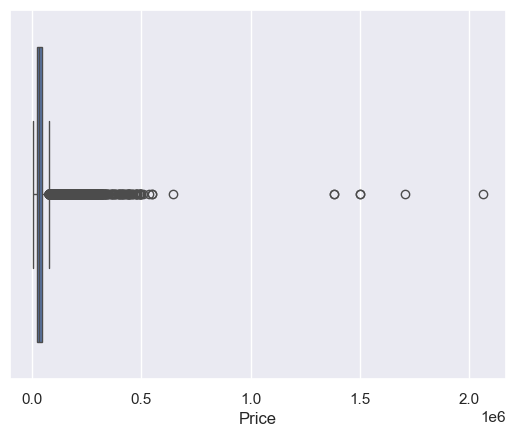

In [14]:
# Detecting Outliers
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

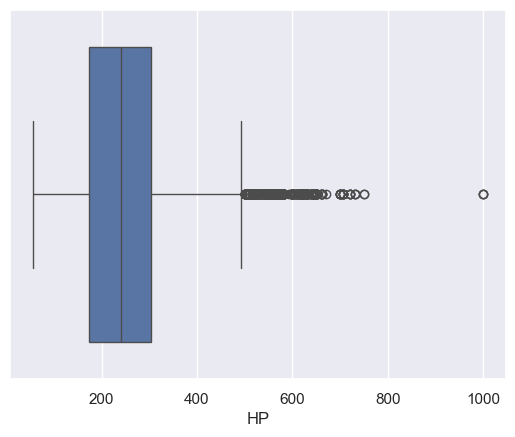

In [15]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

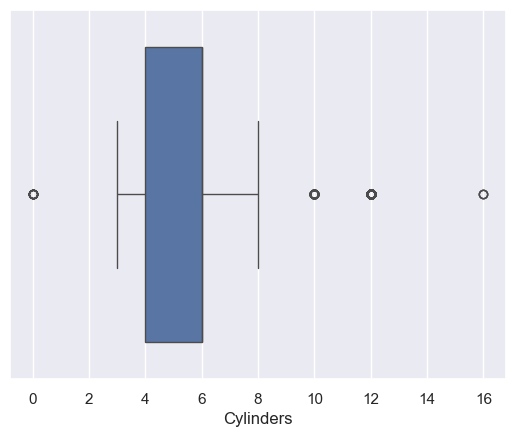

In [16]:
sns.boxplot(x=df['Cylinders'])

In [45]:
# Select only numeric columns for calculating quantiles and IQR
numeric_df = df.select_dtypes(include=[float, int])

# Calculate Q1, Q3, and IQR on the numeric DataFrame
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter the original DataFrame using the numeric DataFrame's IQR mask
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)


(8297, 12)


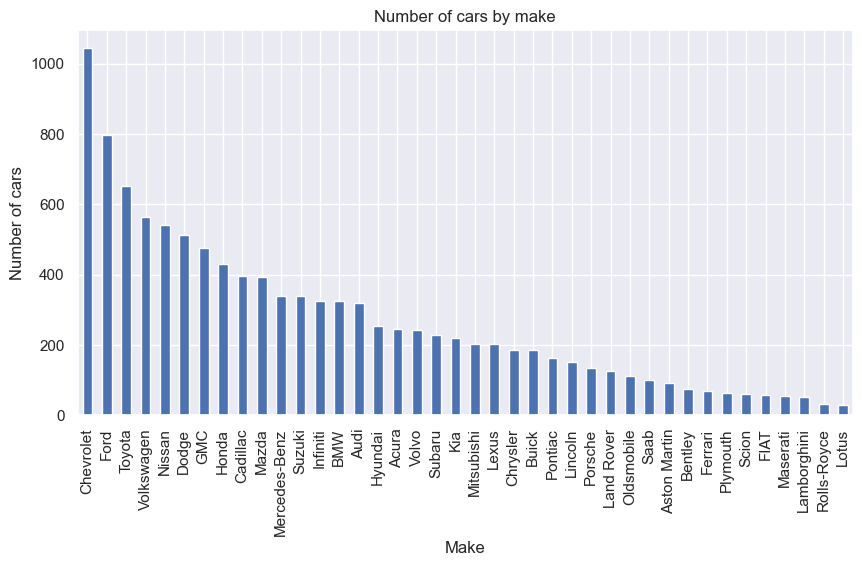

In [18]:
# Plot different features against one another (scatter), against frequency (histogram)

# Histogram
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

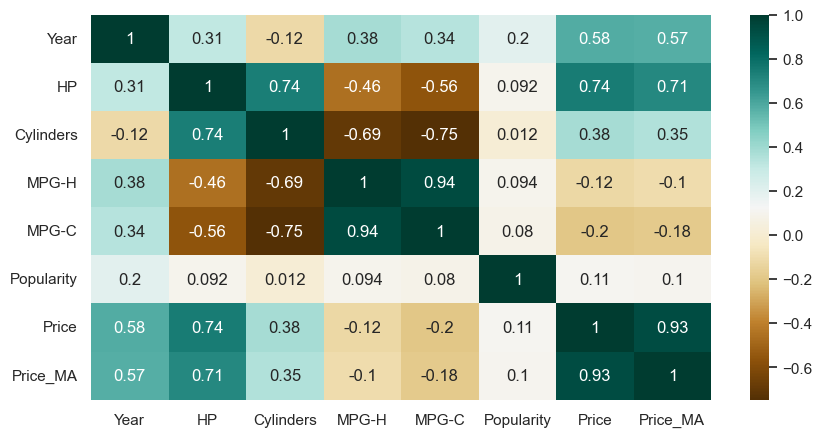

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price,Price_MA
Year,1.000000,0.312539,-0.116188,0.381229,0.341978,0.196329,0.582864,0.570036
HP,0.312539,1.000000,0.735769,-0.455873,-0.556922,0.092390,0.741898,0.705570
Cylinders,-0.116188,0.735769,1.000000,-0.693009,-0.747298,0.011984,0.383164,0.354392
MPG-H,0.381229,-0.455873,-0.693009,1.000000,0.937355,0.093786,-0.120651,-0.102937
MPG-C,0.341978,-0.556922,-0.747298,0.937355,1.000000,0.079919,-0.198115,-0.181857
Popularity,0.196329,0.092390,0.011984,0.093786,0.079919,1.000000,0.112531,0.103013
Price,0.582864,0.741898,0.383164,-0.120651,-0.198115,0.112531,1.000000,0.927078
Price_MA,0.570036,0.705570,0.354392,-0.102937,-0.181857,0.103013,0.927078,1.000000


In [49]:
# First filter for numeric columns 
# Calculate correlation matrix
c = df.select_dtypes(include=[float, int]).corr()

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()
c

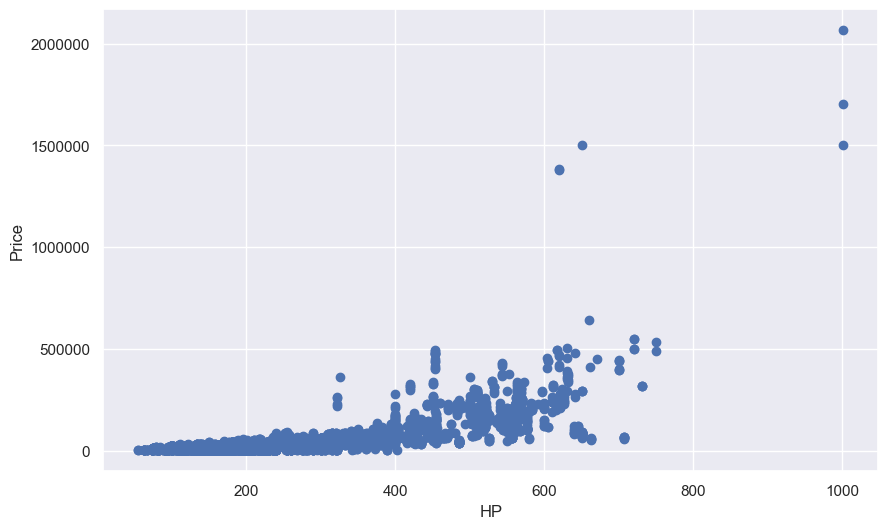

In [31]:
# Scatterplot

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
ax.get_yaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation on y-axis

# TODO: Add Linear Regression
plt.show()

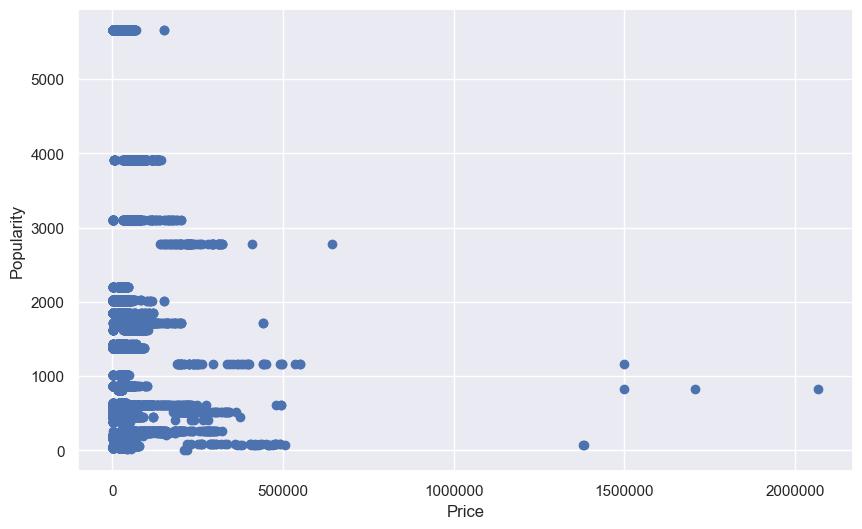

In [30]:
# Plot data and add a linear regression

# Scatterplot Price vs Popularity
# What's the relationship between price and popularity?
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Price'], df['Popularity'])
ax.set_xlabel('Price')
ax.set_ylabel('Popularity')
ax.get_yaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation on y-axis
ax.get_xaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation on x-axis
plt.show()

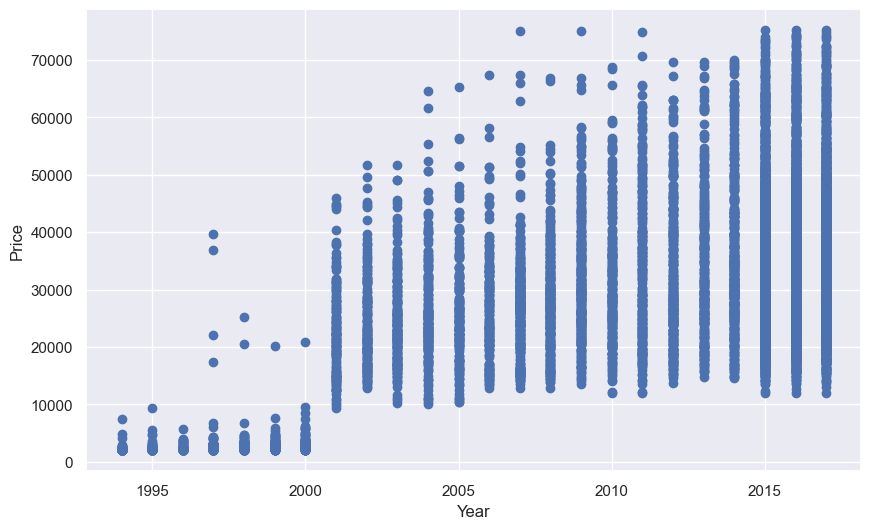

In [54]:
# Plot data and add a linear regression

# Scatterplot Price vs Popularity
# What's the relationship between price and popularity?
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Year'], df['Price'])
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.get_yaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation on y-axis
ax.get_xaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation on x-axis
plt.show()

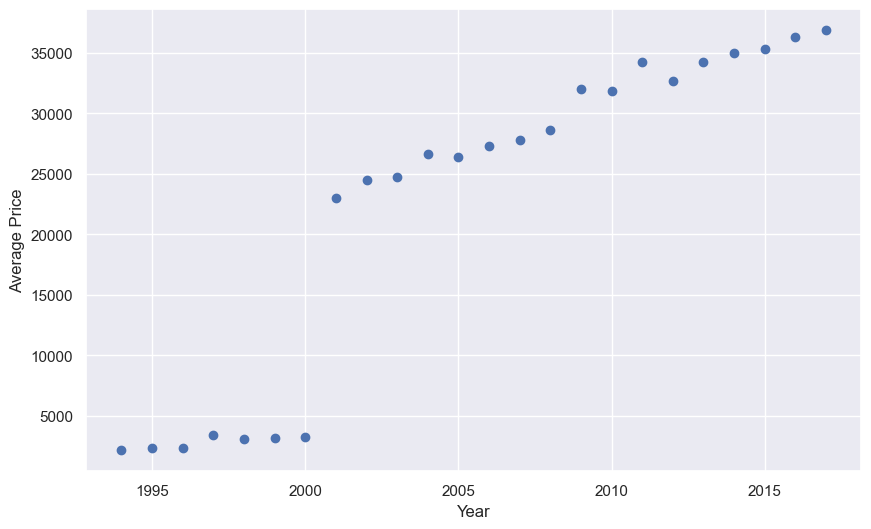

In [53]:
# Year vs Price

# Are cars getting more expensive over the years?

# Split the data by Year
year_data = df.groupby('Year')

# Pull out price column
price_column = year_data['Price']

# Calculate mean
yearly_avg_price = price_column.mean()

# Plot Bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(yearly_avg_price.index, yearly_avg_price.values)
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.get_yaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation on y-axis

# TODO: create a linaer regression and add prediction points to predict what the average price of a car will be in 5 years

plt.show()

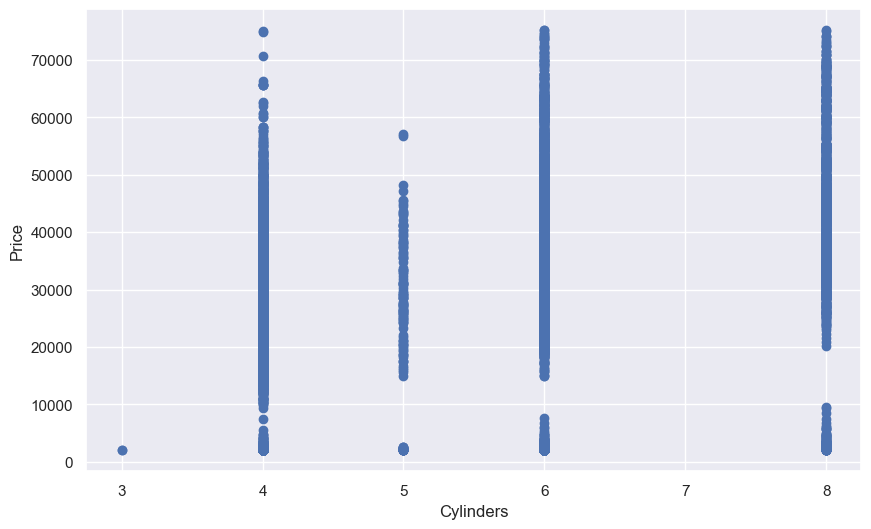

In [51]:
# Price vs Cylindars
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Cylinders'], df['Price'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('Price')
ax.get_yaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation on y-axis

# TODO: Add Linear Regression
plt.show()

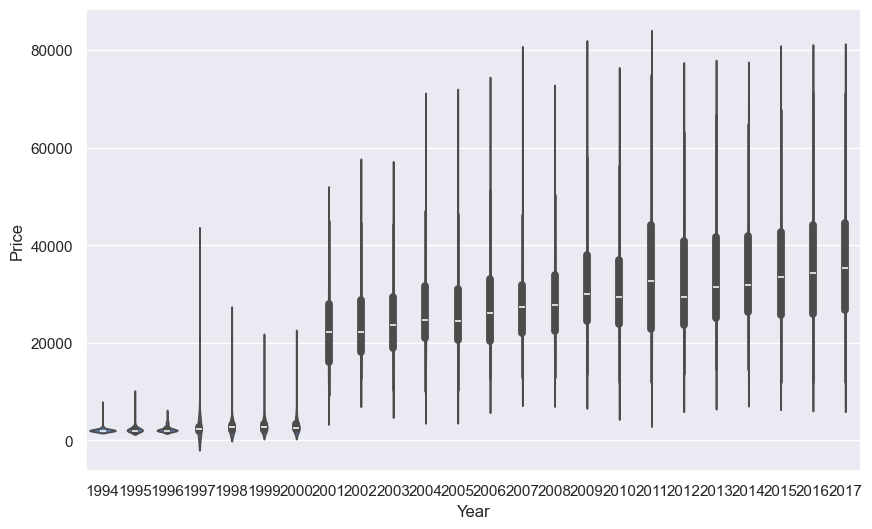

In [52]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(x='Year', y='Price', data=df, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()


### Convert catagorical data into numpy array
- Booleans are regarded as numbers 0 or 1